<a href="https://colab.research.google.com/github/LordFagner/projetoAlura2/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
url = '/content/arquivos/TelecomX_Data_com_0_e_1.csv'
df = pd.read_csv(url)



#🔧 Transformação

In [8]:
total_clientes = df['customerid'].count()

pessoas_que_ficaram = df.query('churn == 0')
pessoas_que_sairam = df.query('churn == 1')

total_que_permanesceram = pessoas_que_ficaram['churn'].count()
total_que_sairam = pessoas_que_sairam['churn'].count()

percentual_que_sairam = (total_que_sairam / total_clientes) * 100
percentual_que_ficaram = (total_que_permanesceram / total_clientes) * 100

homens_que_sairam = pessoas_que_sairam.query('gender == 2')
mulheres_que_sairam = pessoas_que_sairam.query('gender == 1')

homens_que_sairam_percentual = (homens_que_sairam['customerid'].count() / total_que_sairam) * 100
mulheres_que_sairam_percentual = (mulheres_que_sairam['customerid'].count() / total_que_sairam) * 100

mais_de_65 = df.query('seniorcitizen == 1')
mais_de_65_sairam = pessoas_que_sairam.query('seniorcitizen == 1')


mais_de_65_sairam_percentual = (pessoas_que_sairam.query('seniorcitizen == 1')['customerid'].count() / total_que_sairam) * 100
menos_de_65_sairam_percentual = (pessoas_que_sairam.query('seniorcitizen == 0')['customerid'].count() / total_que_sairam) * 100


#mais_de_65_homens_sairam = mais_de_65_sairam.query('gender == 2')
#mais_de_65_mulheres_sairam = mais_de_65_sairam.query('gender == 1 ')


com_parceiro = df.query('partner == 1')


com_parceiro_homens_ficaram = com_parceiro.query('gender == 2 and churn == 0')
com_parceiro_homens_sairam = com_parceiro.query('gender == 2 and churn == 1')
com_parceiro_mulheres_sairam = com_parceiro.query('gender == 1 and churn == 1')

com_parceiro_sairam = com_parceiro.query('churn == 1')['customerid'].count()
com_parceiro_sairam_percentual_chrun = (pessoas_que_sairam.query('partner == 1')['customerid'].count() / pessoas_que_sairam['customerid'].count()) * 100
sem_parceiros_sairam_percentual_chrun = (pessoas_que_sairam.query('partner == 0')['customerid'].count() / pessoas_que_sairam['customerid'].count()) * 100


#
sem_familia_Estruturada =  pessoas_que_sairam.query('not (partner == 1 and dependents == 1)')
familia_Estruturada_numeros = pessoas_que_sairam.query('dependents == 1 and partner == 1')['customerid'].count()
com_familia_estruturada_percentual =(familia_Estruturada_numeros / total_que_sairam) * 100
sem_familia_estruturada_numeros = sem_familia_Estruturada['customerid'].count()

sem_familia_estruturada_percentual =(sem_familia_estruturada_numeros / total_que_sairam) * 100





percentual_conjuge_homem = (com_parceiro_homens_sairam['customerid'].count() / com_parceiro_sairam) * 100
percentual_conjuge_mulher = (com_parceiro_mulheres_sairam['customerid'].count() / com_parceiro_sairam) * 100

com_dependentes = df.query('dependents == 1')

com_dependentes_homens_sairam = com_dependentes.query('gender == 2 and churn == 1')
com_dependentes_mulheres_sairam = com_dependentes.query('gender == 1 and churn == 1')

com_dependentes_total = com_dependentes['customerid'].count()
sem_dependentes_Sairam_percentual = (pessoas_que_sairam.query('dependents == 0')['customerid'].count() / total_que_sairam) * 100
com_dependentes_sairam_percentual = (pessoas_que_sairam.query('dependents == 1')['customerid'].count() / total_que_sairam) * 100

internet_e_telefone = pessoas_que_sairam.query('internetservice != 0 and phoneservice == 1')

so_telefone = pessoas_que_sairam.query('phoneservice == 1 and internetservice == 0')

so_internet = pessoas_que_sairam.query('internetservice != 0 and phoneservice == 0')

churns_que_usam_DSL = pessoas_que_sairam.query('internetservice == 1')
churns_que_usam_fibra = pessoas_que_sairam.query('internetservice == 2')

servicos = [
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies'
]

total_internet_telefone = internet_e_telefone['customerid'].count()

servicos_porcentagens = {
    serv: (internet_e_telefone.query(f'{serv} == 1')['customerid'].count() / total_internet_telefone) * 100
    for serv in servicos
}

# corrigindo as variáveis com nomes errados

contratos_sairam = pessoas_que_sairam.groupby('contract').size()
df_contratos_sairam = contratos_sairam.reset_index()
df_contratos_sairam.columns = ['contract', 'count']


contratos_ficaram = pessoas_que_ficaram.groupby('contract').size()
df_contratos_ficaram = contratos_ficaram.reset_index()
df_contratos_ficaram.columns = ['contract', 'count']

df_contratos_ficaram['percentual'] = (df_contratos_ficaram['count'] / total_que_permanesceram) * 100
df_contratos_sairam['percentual'] = (df_contratos_sairam['count'] / total_que_sairam) * 100




metodos_pagamentos_ficaram = pessoas_que_ficaram['paymentmethod'].value_counts().sort_index()
metodos_pagamentos_sairam = pessoas_que_sairam['paymentmethod'].value_counts().sort_index()

df_contratos_percentual = df_contratos_sairam.merge(
    df_contratos_ficaram,
    on='contract',
    how='outer',
    suffixes=('_sairam', '_ficaram')
).fillna(0)



consumo_de_internet_ficaram =  pessoas_que_ficaram.groupby('internetservice').size()
consumo_de_internet_sairam = pessoas_que_sairam.groupby('internetservice').size()
consumo_de_internet_ficaram_percentual = consumo_de_internet_ficaram.apply(lambda x: (x / pessoas_que_ficaram['customerid'].count()) * 100)
consumo_de_internet_sairam_percentual = consumo_de_internet_sairam.apply(lambda x: (x / pessoas_que_sairam['customerid'].count()) * 100)

planos_internet_consumo = pd.DataFrame({'Ficaram' : consumo_de_internet_ficaram_percentual , 'Sairam' : consumo_de_internet_sairam_percentual})
planos_internet_consumo = planos_internet_consumo.reindex([0,1,2])
nomes_planos = ['DSL', 'Fibra', 'sem internet']


duracao_media_geral = np.round(df['tenure'].mean())
duracao_media_de_tempo_de_contrato_ficaram = np.round(pessoas_que_ficaram['tenure'].mean())
duracao_media_de_tempo_de_contrato_sairam = np.round(pessoas_que_sairam['tenure'].mean())
duracao_media_tempo_month_to_month = np.round(pessoas_que_ficaram.query('contract == 2')['tenure'].mean())


duracoes = [
    duracao_media_geral,
    duracao_media_de_tempo_de_contrato_ficaram,
    duracao_media_de_tempo_de_contrato_sairam,
    duracao_media_tempo_month_to_month
]

labelsa = ['Média Geral', 'Média Ficaram', 'Média Saíram', 'Média Month-to-Month (Ficaram)']


solteiro_com_filho = pessoas_que_sairam.query('partner == 0 and dependents == 1')  # Sem parceiro, com dependentes
casado_sem_filho= pessoas_que_sairam.query('partner == 1 and dependents == 0') # Com parceiro, sem dependentes
solteiro_Sem_filho = pessoas_que_sairam.query('partner == 0 and dependents == 0')  # Sem parceiro e sem dependentes






#feito
gasto_de_pessoas_sem_familia_Estruturada = np.round(sem_familia_Estruturada['charges_total'].mean().astype(float))
media_geral_De_Gastos = np.round(
    df['charges_total'].mean())
media_solteiro_sem_filho = np.round(solteiro_Sem_filho['charges_total'].mean())

medias_gasto = [gasto_de_pessoas_sem_familia_Estruturada,media_geral_De_Gastos,media_solteiro_sem_filho]

categoriasa = ['sem familia estruturada','media geral', 'solteiro sem filho']

#feito
solteiro_com_filho_Gasto = solteiro_com_filho['charges_total'].mean()
casado_sem_filho_Gasto = casado_sem_filho['charges_total'].mean()
solteiro_Sem_filho_Gasto = solteiro_Sem_filho['charges_total'].mean()

gastos_sub_Grupo  = [solteiro_com_filho_Gasto, solteiro_Sem_filho_Gasto,casado_sem_filho_Gasto]
categorias1 = ['solteiro com filho', 'solteiro sem filho','casado sem filho']

#falta fazer
sem_familia_Estruturada_Gasto_por_contrato = sem_familia_Estruturada.groupby('contract')['charges_total'].mean()
gasto_medio_por_contrato = df.groupby('contract')['charges_total'].mean()
solteiro_Sem_filho_Gasto_contrato = solteiro_Sem_filho.groupby('contract')['charges_total'].mean()

#
consomem_servico_de_telefonia = pessoas_que_sairam.query('phoneservice == 1')['customerid'].count()
tem_somente_1_linha = pessoas_que_sairam.query('multiplelines == 0')['customerid'].count()
tem_somente_mais_de_1_linha = pessoas_que_sairam.query('multiplelines == 2')['customerid'].count()

#
sem_familia_estruturada_telefonia = sem_familia_Estruturada.query('phoneservice == 1')['customerid'].count()
sem_familia_estruturada_somente_1_linha = sem_familia_Estruturada.query('multiplelines == 0')['customerid'].count()
sem_familia_estruturada_mais_de_1_linha = sem_familia_Estruturada.query('multiplelines == 1')['customerid'].count()

#
sem_Familia_Esturutrada_gasto_Com_internet_e_telefonia = sem_familia_Estruturada.query('internetservice != 0 and phoneservice == 1')['charges_total'].mean()
sem_familia_Estruturda_gasto_somente_Telefonia = sem_familia_Estruturada.query('phoneservice == 1 and internetservice == 0')['charges_total'].mean()
sem_familia_Estrutrada_gasto_somente_com_internet = sem_familia_Estruturada.query('internetservice != 0 and phoneservice == 0')['charges_total'].mean()

#
sem_familia_estruturada_Gasto_com_fibra = sem_familia_Estruturada.query('internetservice == 2 and phoneservice == 0')['charges_total'].mean()
gasto_medio_com_fibra = df.query('internetservice == 2')['charges_total'].mean()

#

sem_familia_Estruturada_Gastos_internet_e_telofinia = sem_familia_Estruturada.groupby(['internetservice','phoneservice'])['charges_total'].mean()
df_sem_familia_Estruturada_internet_e_telofinia = sem_familia_Estruturada_Gastos_internet_e_telofinia.reset_index()



#

solteiro_Sem_filho_gasto_telefonia_internet_contrato = solteiro_Sem_filho.groupby(['contract','internetservice','phoneservice'])['charges_total'].mean()


#
gastos_por_contrato_analisar_diferenca = pessoas_que_sairam.query('internetservice == 2 and `contract` == 2').groupby('paymentmethod')['charges_monthly'].mean()


#


fibra = consumo_de_internet_ficaram[2]
fibra_perc = (fibra/df.query('internetservice == 2')['customerid'].count()) * 100

clientes_fibra_servicos = df.query('internetservice == 2').groupby(['onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies']).size()
df_consumo_fibra = clientes_fibra_servicos.reset_index()
df_consumo_fibra.columns = ['onlinesecurity', 'onlinebackup', 'deviceprotection',
                              'techsupport', 'streamingtv', 'streamingmovies', 'count']

df_consumo_fibra['count'] = df_consumo_fibra['count'].map(
    lambda x :( (x / pessoas_que_sairam.query('internetservice == 2')['customerid'].count() ) *100 )
)






#bom infelizemente eu fiz a maioria no meu git hub , mais deixarei esse anexado ao git, pra vcs teremem uma noção do que foi feito
# mais basicamente usamos muito da estrutura unique , para extrair os valores é troca-los para numericos para fins de velocidade é manopulação numerica
#muito se baseou no seguinte exemplo  valores_para_elemento = {val : ind , for val,ind in enumerate(df['coluna'].dropna().unique().str.lower())} é após isso
# o uso da função map para uma unica coluna , é applymap para os demais , estará constando nos comitts do github

#📊 Carga e análise

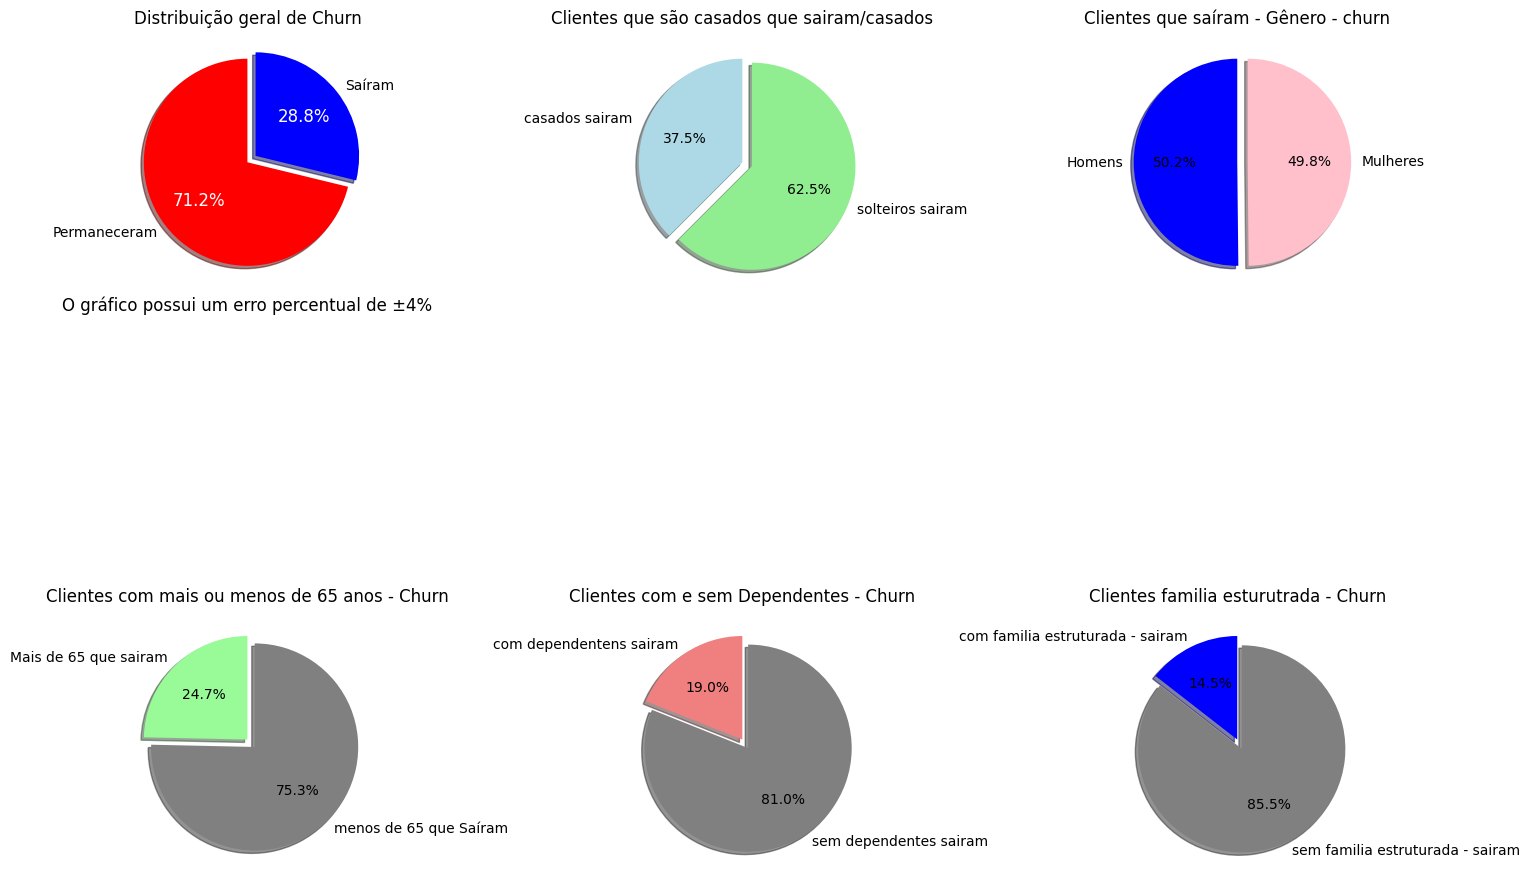

/tmp/ipython-input-9-3093485229.py:141: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(['','',''], rotation=-3, ha='right')


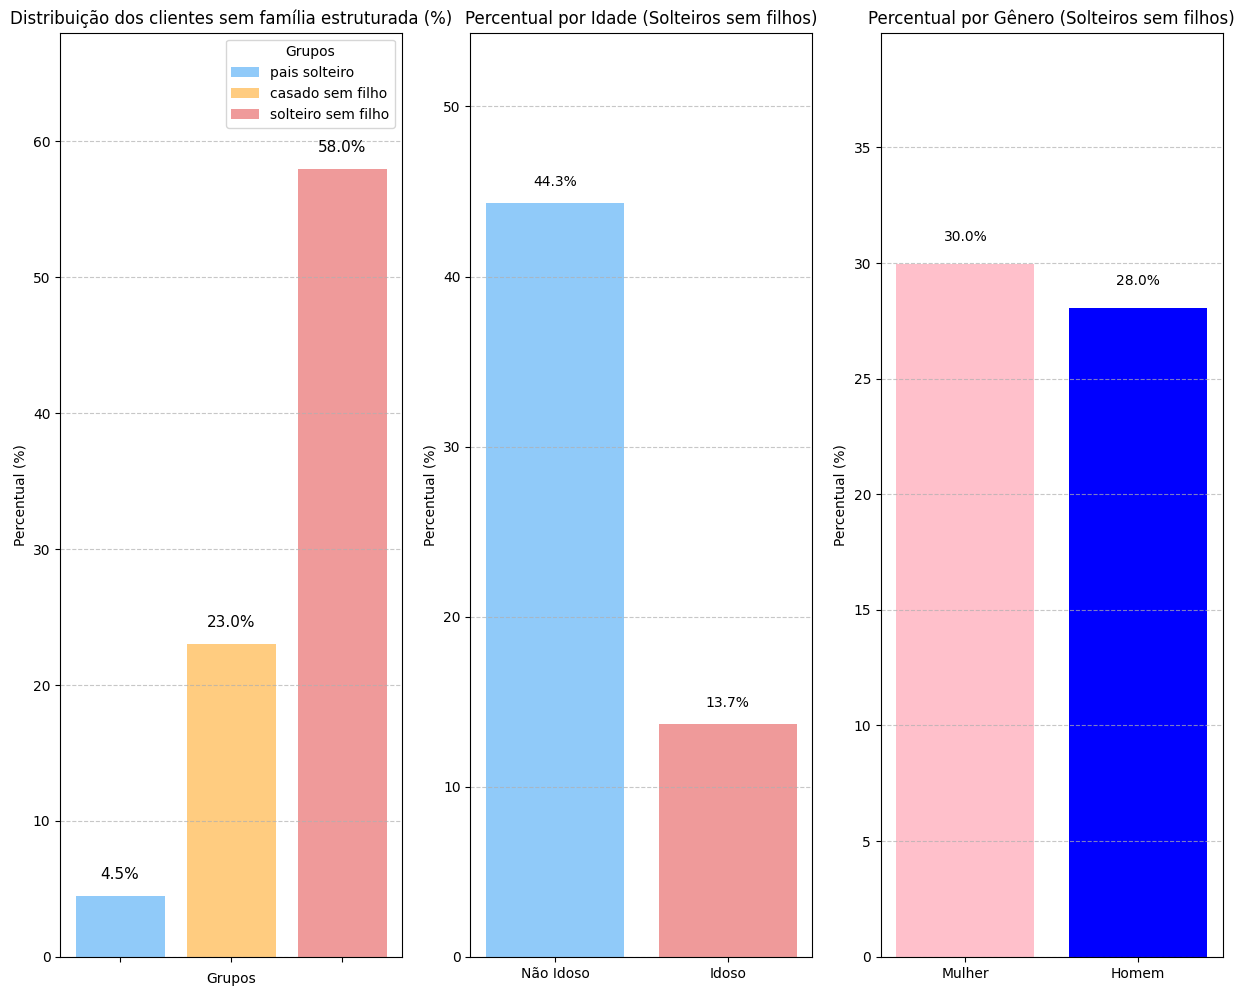

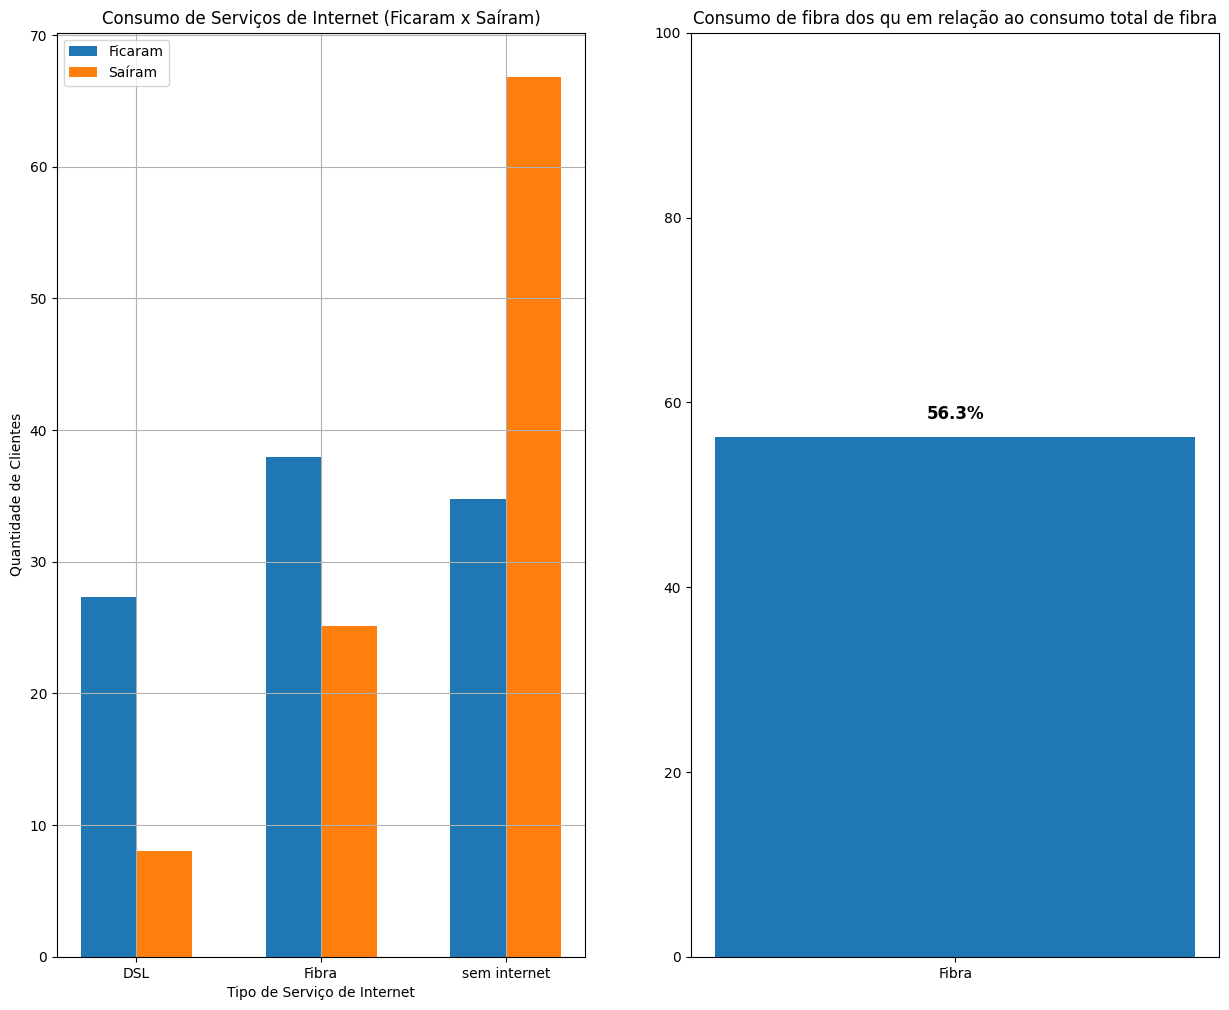

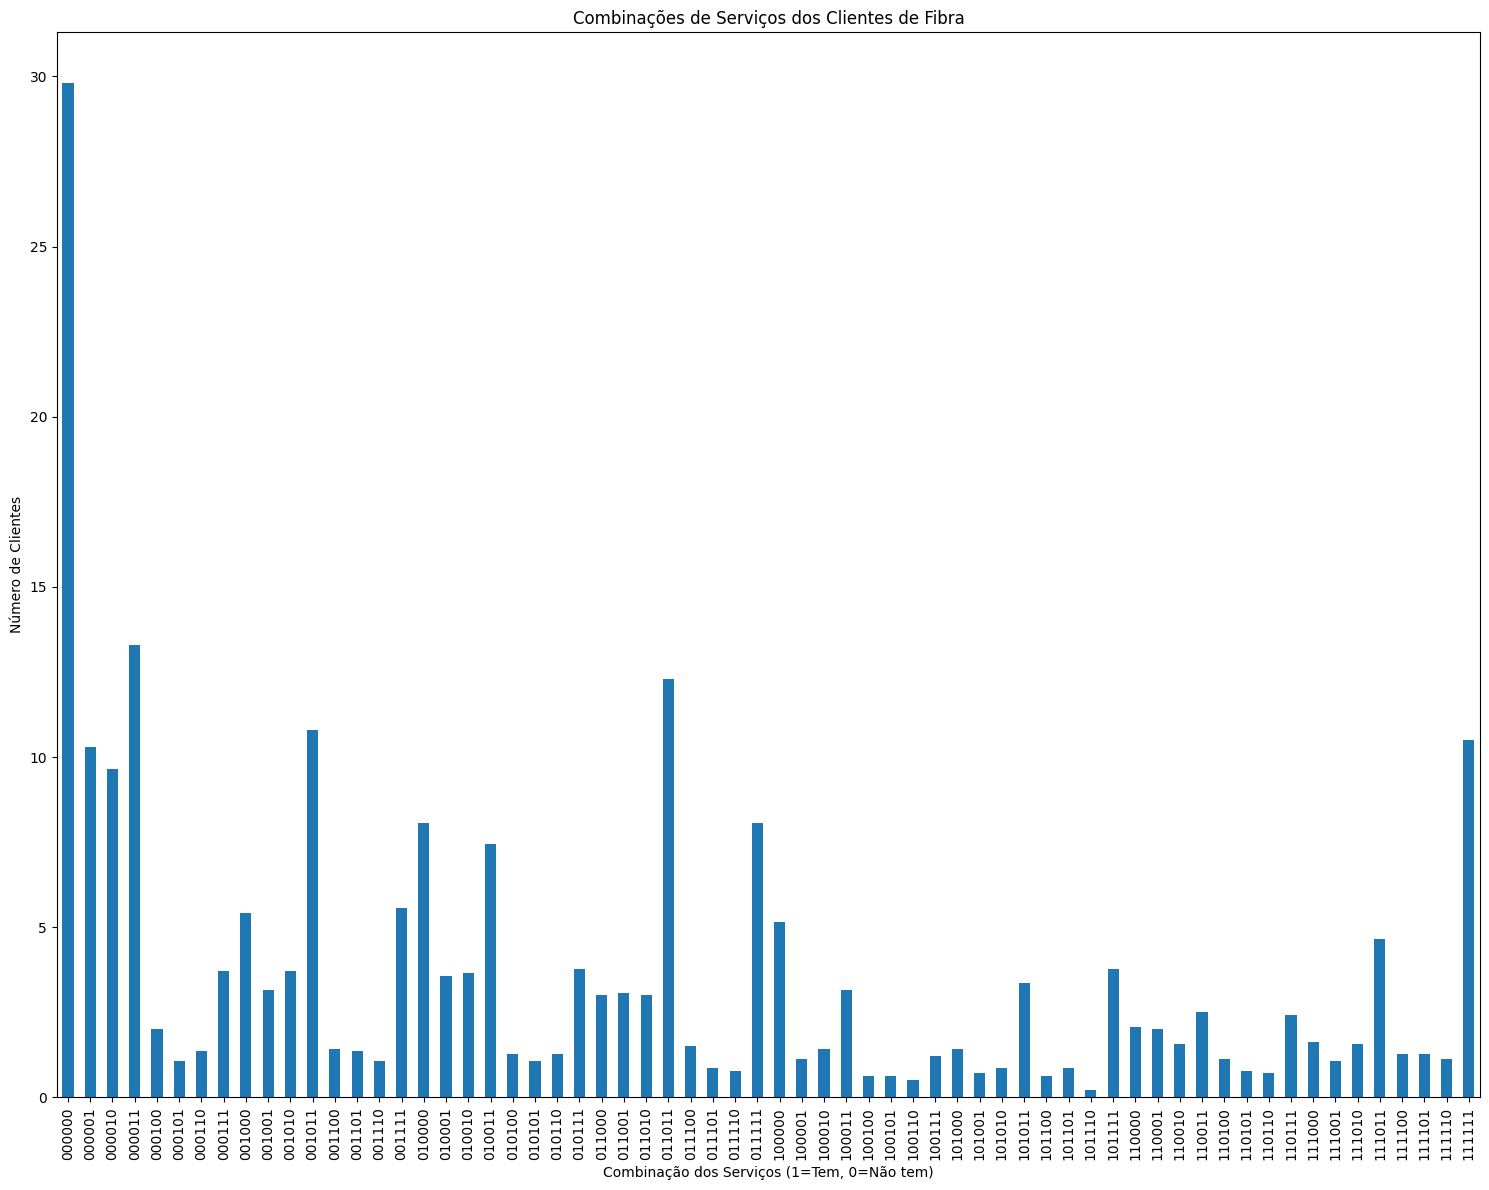

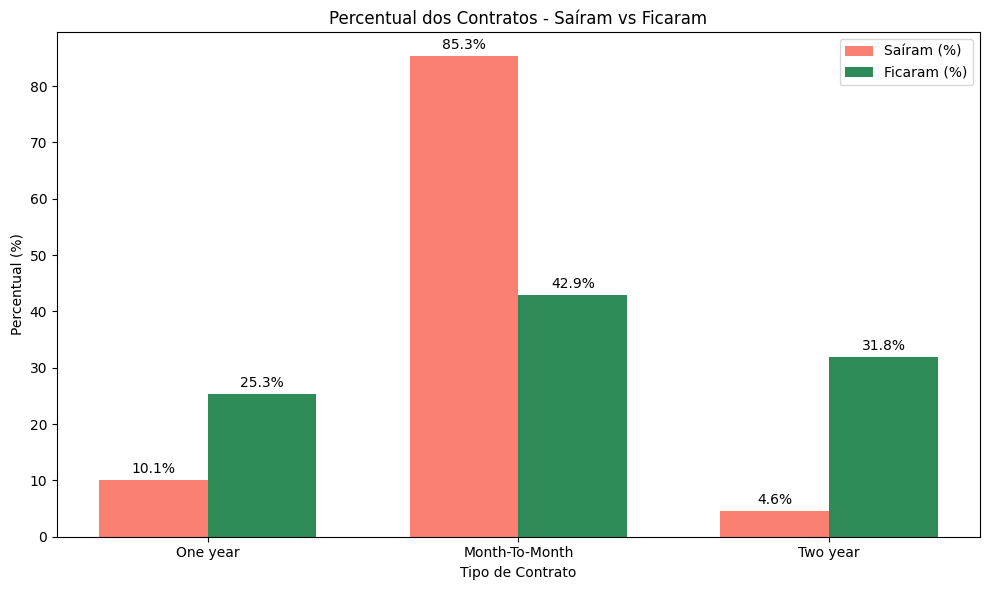

/tmp/ipython-input-9-3093485229.py:263: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axo.set_xticklabels(labelsa, rotation=30)


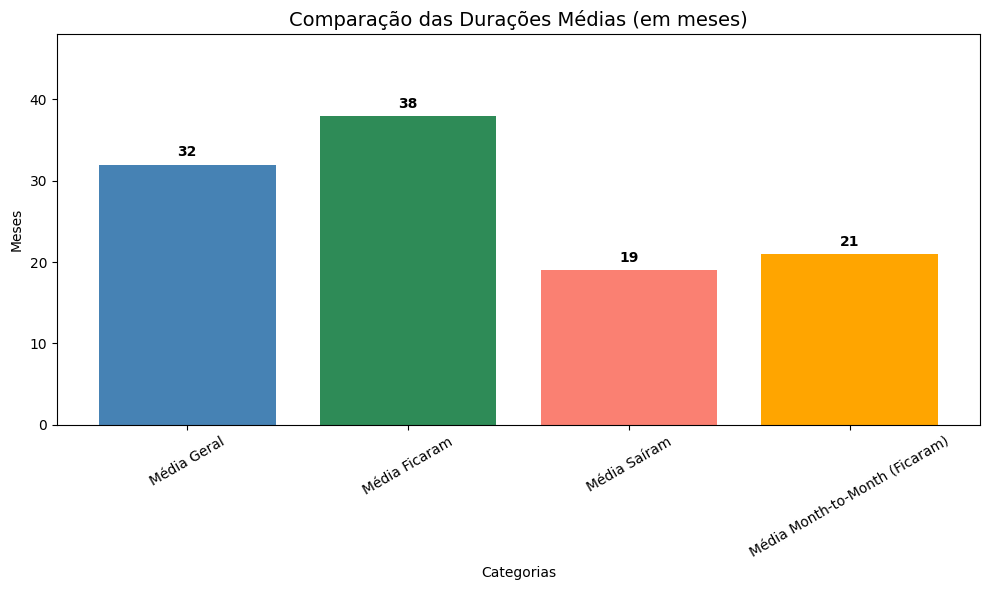

/tmp/ipython-input-9-3093485229.py:285: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  analise_f[0,0].set_xticklabels(categoriasa, rotation=15, ha='right', fontsize=10)
/tmp/ipython-input-9-3093485229.py:300: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  analise_f[0,1].set_xticklabels(categorias1, rotation=15, ha='right', fontsize=10)


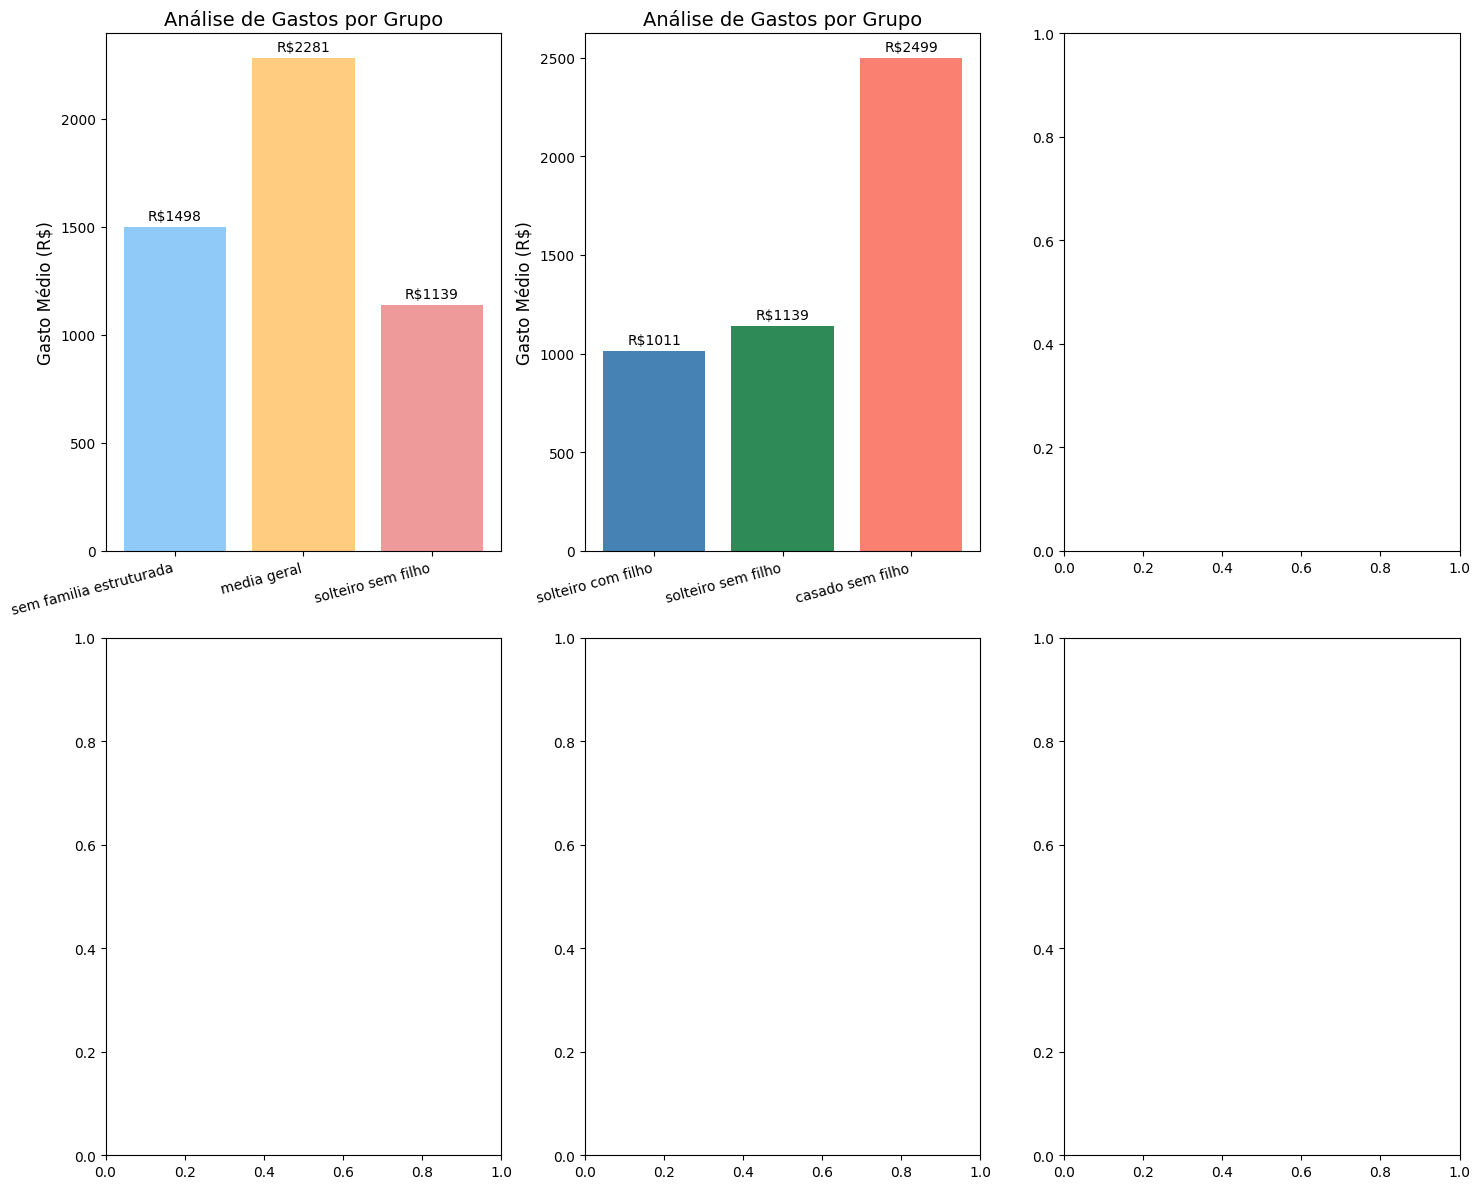

In [9]:
fig, sairam_ficaram = plt.subplots(2, 3, figsize=(15, 12))

# ---------------------------
# Gráfico 1 - Churn geral
wd, tx, at = sairam_ficaram[0, 0].pie(
    [total_que_permanesceram, total_que_sairam],
    labels=['Permaneceram', 'Saíram'],
    colors=['red', 'blue'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)

for text in at:
    text.set_color('white')
    text.set_fontsize(12)

# Adicionando texto no gráfico
sairam_ficaram[0, 0].text(
    0, -1.3,
    'O gráfico possui um erro percentual de ±4%',
    fontsize=12, ha='center', va='top', color='black'
)
sairam_ficaram[0, 0].set_title('Distribuição geral de Churn')

# ---------------------------
# Gráfico 2 -
sairam_ficaram[0, 1].pie(
    [com_parceiro_sairam_percentual_chrun,sem_parceiros_sairam_percentual_chrun],
    labels=['casados sairam ', 'solteiros sairam'],
    colors = ['lightblue', 'lightgreen'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)
sairam_ficaram[0, 1].set_title('Clientes que são casados que sairam/casados')

# ---------------------------
# Gráfico 3 - Gênero dos que saíram
sairam_ficaram[0, 2].pie(
    [homens_que_sairam_percentual, mulheres_que_sairam_percentual],
    labels=['Homens', 'Mulheres'],
    colors=['blue', 'pink'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)
sairam_ficaram[0, 2].set_title('Clientes que saíram - Gênero - churn')

# ---------------------------
# Gráfico 4 - Mais de 65 anos: Ficaram vs Saíram
sairam_ficaram[1, 0].pie(
    [mais_de_65_sairam_percentual, menos_de_65_sairam_percentual],
    labels=['Mais de 65 que sairam', 'menos de 65 que Saíram'],
    colors=['palegreen', 'gray'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)
sairam_ficaram[1, 0].set_title('Clientes com mais ou menos de 65 anos - Churn')

# ---------------------------
# Espaço vazio nos gráficos [1,1] e [1,2] (se quiser pode usar ou deixar em branco)
sairam_ficaram[1, 1].pie(
    [com_dependentes_sairam_percentual, sem_dependentes_Sairam_percentual],
    labels=['com dependentens sairam', 'sem dependentes sairam'],
    colors=['lightcoral', 'gray'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1),
    shadow=True
)
sairam_ficaram[1, 1].set_title('Clientes com e sem Dependentes - Churn')

sairam_ficaram[1, 2].pie([com_familia_estruturada_percentual , sem_familia_estruturada_percentual] ,
    labels=['com familia estruturada - sairam', 'sem familia estruturada - sairam'],
    colors=['blue', 'gray'],
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1),
    shadow=True,
              )
sairam_ficaram[1, 2].set_title('Clientes familia esturutrada - Churn')

for ax in sairam_ficaram.flat:
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    for spine in ax.spines.values():
        spine.set_color('black')
        spine.set_linewidth(1.5)





plt.tight_layout()
plt.show()



# Lista de categorias e valores
categorias = ['Sem parceiro\nCom dependentes',
               'Com parceiro\nSem dependentes',
               'Sem parceiro\nSem dependentes']

valores = [
     (solteiro_com_filho['customerid'].count()/total_que_sairam) * 100,
     (casado_sem_filho['customerid'].count()/total_que_sairam) * 100 ,
     (solteiro_Sem_filho['customerid'].count()/total_que_sairam) * 100]


fig2, ax = plt.subplots(1,3,figsize=(15, 12))
categorias = ['pais solteiro',
               'casado sem filho',
               'solteiro sem filho']


bars = ax[0].bar(categorias, valores, color=['#90CAF9', '#FFCC80', '#EF9A9A'])

# Texto nas barras
for i, v in enumerate(valores):
    ax[0].text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=11)

# Títulos e labels
ax[0].set_title('Distribuição dos clientes sem família estruturada (%)')
ax[0].set_ylabel('Percentual (%)')
ax[0].set_xlabel('Grupos')

# Limite do eixo y para dar espaço para os textos
ax[0].set_ylim(0, max(valores) + 10)

# Grid opcional para melhorar leitura
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].legend(bars, categorias, title='Grupos')
ax[0].set_xticklabels(['','',''], rotation=-3, ha='right')



soletiro_sem_filho_genero = solteiro_Sem_filho.groupby(['gender']).size()
solteiro_Sem_filho_idade = solteiro_Sem_filho.groupby(['seniorcitizen']).size()

solteiro_Sem_filho_idade_percentual = solteiro_Sem_filho_idade.apply(lambda x: (x / total_que_sairam) * 100)
soletiro_sem_filho_genero_percentual = soletiro_sem_filho_genero.apply(lambda x: (x / total_que_sairam) * 100)

bars1 = ax[1].bar(
    solteiro_Sem_filho_idade_percentual.index.map({0: 'Não Idoso', 1: 'Idoso'}),
    solteiro_Sem_filho_idade_percentual.values,
    color=['#90CAF9', '#EF9A9A']
)
ax[1].set_title('Percentual por Idade (Solteiros sem filhos)')
ax[1].set_ylabel('Percentual (%)')
ax[1].set_ylim(0, max(solteiro_Sem_filho_idade_percentual.values) + 10)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars1:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center')

# Gráfico 2 — Percentual por Gênero
bars2 = ax[2].bar(
    soletiro_sem_filho_genero_percentual.index.map({1: 'Mulher', 2: 'Homem'}),
    soletiro_sem_filho_genero_percentual.values,
    color=['pink', 'blue']
)
ax[2].set_title('Percentual por Gênero (Solteiros sem filhos)')
ax[2].set_ylabel('Percentual (%)')
ax[2].set_ylim(0, max(soletiro_sem_filho_genero_percentual.values) + 10)
ax[2].grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars2:
    height = bar.get_height()
    ax[2].text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center')

plt.show()


fig3, financeiro = plt.subplots(1, 2, figsize=(15, 12))
x = np.array(planos_internet_consumo.index)
width = 0.3

financeiro[0].bar(x - width/2, planos_internet_consumo['Ficaram'], width=width, label='Ficaram')
financeiro[0].bar(x + width/2, planos_internet_consumo['Sairam'], width=width, label='Saíram')

financeiro[0].set_xticks(x)
financeiro[0].set_xticklabels([nomes_planos[i] for i in x])

financeiro[0].set_title('Consumo de Serviços de Internet (Ficaram x Saíram)')
financeiro[0].set_xlabel('Tipo de Serviço de Internet')
financeiro[0].set_ylabel('Quantidade de Clientes')
financeiro[0].legend()
financeiro[0].grid(True)

financeiro[1].bar(0, fibra_perc, width=0.01, label='Ficaram')
financeiro[1].set_xticks([0])
financeiro[1].set_xticklabels(['Fibra'])
financeiro[1].set_ylim(0, 100)  # eixo Y de 0 a 100
financeiro[1].set_title('Consumo de fibra dos qu em relação ao consumo total de fibra')

# Colocar o valor percentual em cima da barra
financeiro[1].text(0, fibra_perc + 2, f'{fibra_perc:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.show()

df_consumo_fibra['comb'] = df_consumo_fibra[['onlinesecurity', 'onlinebackup', 'deviceprotection',
                                                'techsupport', 'streamingtv', 'streamingmovies']].astype(str).agg(''.join, axis=1)



df_consumo_fibra.plot(
    kind='bar',
    x='comb',
    y='count',
    figsize=(15,12),
    legend=False
)

plt.title('Combinações de Serviços dos Clientes de Fibra')
plt.ylabel('Número de Clientes')
plt.xlabel('Combinação dos Serviços (1=Tem, 0=Não tem)')
plt.tight_layout()
plt.show()

labels = ['One year','Month-To-Month','Two year']
sairam = df_contratos_percentual['percentual_sairam']
ficaram = df_contratos_percentual['percentual_ficaram']

x = np.arange(len(labels))  # posições dos grupos
width = 0.35  # largura das barras

# Plot
fig, axp = plt.subplots(figsize=(10, 6))
b1 = axp.bar(x - width/2, sairam, width, label='Saíram (%)', color='salmon')
b2 = axp.bar(x + width/2, ficaram, width, label='Ficaram (%)', color='seagreen')

# Labels
axp.set_ylabel('Percentual (%)')
axp.set_xlabel('Tipo de Contrato')
axp.set_title('Percentual dos Contratos - Saíram vs Ficaram')
axp.set_xticks(x)
axp.set_xticklabels(labels)
axp.legend()
axp.bar_label(b1, fmt='%.1f%%', padding=3)
axp.bar_label(b2, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()


fig, axo = plt.subplots(1, 1, figsize=(10, 6))  # 1 linha, 1 coluna, 1 gráfico

# Gráfico de barras
axo.bar(labelsa, duracoes, color=['steelblue', 'seagreen', 'salmon', 'orange'])

# Títulos e rótulos
axo.set_title('Comparação das Durações Médias (em meses)', fontsize=14)
axo.set_ylabel('Meses')
axo.set_xlabel('Categorias')
axo.set_ylim(0, max(duracoes) + 10)
axo.set_xticklabels(labelsa, rotation=30)

# 🔥 Adicionando os valores em cima das barras
for i, v in enumerate(duracoes):
    axo.text(i, v + 1, f'{v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()




fig, analise_f = plt.subplots(2, 3, figsize=(15, 12))


bars = analise_f[0,0].bar(categorias, medias_gasto, color=['#90CAF9', '#FFCC80', '#EF9A9A'])


analise_f[0,0].set_title('Análise de Gastos por Grupo', fontsize=14)

analise_f[0,0].set_ylabel('Gasto Médio (R$)', fontsize=12)

analise_f[0,0].set_xticklabels(categoriasa, rotation=15, ha='right', fontsize=10)

for bar in bars:
    height = bar.get_height()
    analise_f[0,0].annotate(f'R${height:.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Pequeno deslocamento acima da barra
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)



bars = analise_f[0,1].bar(categorias1, gastos_sub_Grupo, color=['steelblue', 'seagreen', 'salmon'])
analise_f[0,1].set_title('Análise de Gastos por Grupo', fontsize=14)
analise_f[0,1].set_ylabel('Gasto Médio (R$)', fontsize=12)
analise_f[0,1].set_xticklabels(categorias1, rotation=15, ha='right', fontsize=10)

for bar in bars:
   height = bar.get_height()
   analise_f[0,1].annotate(f'R${height:.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Pequeno deslocamento acima da barra
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#📄Relatorio Final

considerações iniciais

-os dados apresentados não constam data de saida ou feedback  dos clientes ,logo é impossivel avaliar se o churn diminui ou subiu , ou ainda se isso é uma tendencia ,um fenomeno isolado , ou algo sanzonal ... dentro dessas limitações .

fatos identifcados :
os clientes que sairam correspondem a 28,8%  onde dentro desses 28,8% temos os seguintes valores :
62,5% seram solteiros
50,2% eram  homens
75,3% não são idosos
81,0% não tem dependentes
85,5% não tem uma familia estruturada(mulher e filhos)

percebmos que dois 3 eixos se destacam solteiros , jovens e sem dependentes

ao analisarmos o subconjunto com maior discprancia (sem familia estruturada) temos que 44% das pessoas que sairam são jovens, solteiros e sem filhos , oque torna esse grupo de longe o com maior evasão , representando quando 50 % dos churns

as demais informações não representam variaveis relevantes o  suficiente para serem destacadas , uma vez que englobam a minoria uma vez que e inerente tentar entender ou ao menos especular o pq da evasão de pessoas que engolbam as categorias compositoras do conjunto sem familia estruturada



ao analisar o consumo em cada grupo(sairam,ficaram) percebos um padrão , quase 70% das pessoas que sairma consumiam o serviço de fibra otica, oque demonstra um problema grave na fibra otica , pq esses 70% do grupo de pessoas que sairam correspondem mais da metade de todo mundo que contrata fibra , quase 60%.

a analise do seviço contratados juntos a fibra será embasada em conjuntos de 6 zeros (000000) onde cada 1 mostra o consumo de um serviço , abaixo está a precendencia posicional do cada seviço :

Posição	Serviço
1º	OnlineSecurity
2º	OnlineBackup
3º	DeviceProtection
4º	TechSupport
5º	StreamingTV
6º	StreamingMovies

analisando o consumo de fibra dos que sairam , temos que quase 30% não consumiam nenhum servuço adicional , e somente 4 picos passam ou chegam nos 10% de consumo :

-000001-> stream movie
-000011-> consome stream tv e stream movie
-001011-> device protetion consome stream tv e stream movie
-011011-> online backup device protetion consome stream tv e stream movie
-111111 -> consome todos os serviços

oque demonstram que pessoas que em geral consomem algum serviço saem menos do que pessoas que não consome nenhum , oque pode apontar que o serviço puro pode não ser satisfatorio para os clientes


Percebemos outro foco grave , quase 85% das pessoas que sairam assinaram o plano Month-to-Month ou seja pagamento mensal , enquanto as pessoas que ficaram apresentam uma melhor distribuição  não varaiando mais de 20% de um para ou outro .

os contratos month-to-month nas pessoas que sairam duram cerca 11 meses a menos que a media geral de contrato.
eqnaunto a media de tempo na empresa dos que sairam é quase 2 anos a menos .

bom inicialmente percebemos um certo problema, considerando o local do pais que estamos falando , o gasto de 1400 de pessoas sem familia estruturada é um pouco delicado , no cenario brasileiro isso equivale a quase 100% do salario minimo , nos eua isso equivale a quase 1 alugel de uma casa ,então um gasto medio de 1000 dinheiros , pode a depender do pais , ser problematico para pessoas que tem familia não estruturada ou ainda para solteiros.

cruzando os dados de grupos que sairam, com o gasto , percebmos que , pessoas que tem filhos ou um conjuge gastam mais e saem menos , oque indica que os planos quando beneficos a somente uma pessoa(Sem dependentes ou conjuge) ,indicam um custo benefecio ruim para essas pessoas , oque deve ser analisado pelo time de analise financeira , uma sugestão inicial , seria reduzir os valores de planos ou ainda pacotes promocionais , para essas pessoas , mesmo que com franquia de internet reduzida.


'''
# Isto está formatado como código
```

